# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [128]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor


### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [103]:
possumdf = pd.read_csv("/Users/burnesbrown1/Documents/Coding Temple/Coding_Temple_Two/Classification/classification-practice-main/data/possum.csv")

### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [104]:
possumdf.head()
possumdf.columns = possumdf.columns.str.lower().str.replace(' ', '_')
possumdf.columns
possumdf.head()
possumdf.isnull().sum()



site       0
pop        0
sex        0
age        2
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [105]:
possumdf.dropna(inplace=True)
possumdf.isnull().sum()

site       0
pop        0
sex        0
age        0
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [71]:
clean_possum=pd.DataFrame()


In [106]:
possumdf.info

<bound method DataFrame.info of      site    pop sex  age  head_l  skull_w  total_l  tail_l
0       1    Vic   m  8.0    94.1     60.4     89.0    36.0
1       1    Vic   f  6.0    92.5     57.6     91.5    36.5
2       1    Vic   f  6.0    94.0     60.0     95.5    39.0
3       1    Vic   f  6.0    93.2     57.1     92.0    38.0
4       1    Vic   f  2.0    91.5     56.3     85.5    36.0
..    ...    ...  ..  ...     ...      ...      ...     ...
99      7  other   m  1.0    89.5     56.0     81.5    36.5
100     7  other   m  1.0    88.6     54.7     82.5    39.0
101     7  other   f  6.0    92.4     55.0     89.0    38.0
102     7  other   m  4.0    91.5     55.2     82.5    36.5
103     7  other   f  3.0    93.6     59.9     89.0    40.0

[102 rows x 8 columns]>

In [113]:
# Converting binary Nominal Variable Gender to numeric
possumdf["sex"]=possumdf["sex"].replace({"m": 1, "f": 0})
possumdf["pop"]=possumdf["pop"].replace({"Vic": 1, "other": 0})
possumdf.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,1,1,8.0,94.1,60.4,89.0,36.0
1,1,1,0,6.0,92.5,57.6,91.5,36.5
2,1,1,0,6.0,94.0,60.0,95.5,39.0
3,1,1,0,6.0,93.2,57.1,92.0,38.0
4,1,1,0,2.0,91.5,56.3,85.5,36.0


In [114]:
possumdf.corr(method ='pearson')

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
site,1.000000,-0.892305,0.247140,-0.131423,-0.185358,-0.103197,-0.295279,0.372951
pop,-0.892305,1.000000,-0.218511,0.086827,0.026605,-0.039141,0.120819,-0.480852
sex,0.247140,-0.218511,1.000000,-0.064442,0.131190,0.103489,-0.138894,-0.026461
age,-0.131423,0.086827,-0.064442,1.000000,0.319022,0.285107,0.260280,0.118241
head_l,-0.185358,0.026605,0.131190,0.319022,1.000000,0.700511,0.674289,0.276379
skull_w,-0.103197,-0.039141,0.103489,0.285107,0.700511,1.000000,0.503679,0.240899
total_l,-0.295279,0.120819,-0.138894,0.260280,0.674289,0.503679,1.000000,0.563297
tail_l,0.372951,-0.480852,-0.026461,0.118241,0.276379,0.240899,0.563297,1.000000


### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

In [117]:
possumdf.groupby("pop").mean()

,site,sex,age,head_l,skull_w,total_l,tail_l
pop,,,,,,,
0,5.482759,0.672414,3.689655,92.606897,57.065517,86.787931,37.862069
1,1.250000,0.454545,4.022727,92.795455,56.822727,87.806818,35.965909


Text(0, 0.5, 'age')

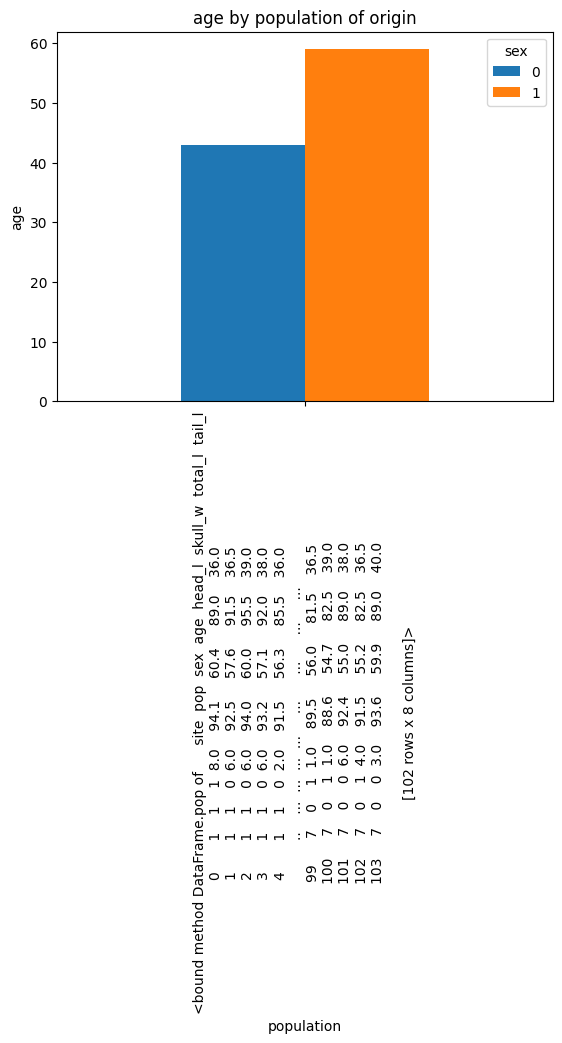

In [120]:

pd.crosstab(possumdf.pop,data.sex).plot(kind='bar')
plt.title('age by population of origin')
plt.xlabel('population')
plt.ylabel('age')


In [126]:
baseline = [possumdf.age.mean()] * len(possumdf)
baseline

[3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333333335,
 3.8333333333

In [130]:
# Identify target vector
target = 'age'

# Separate target vector from feature matrix
X = possumdf.drop(columns=target)
y = possumdf[target]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

# Assert statement to check split
assert len(x_train) + len(x_test) == len(X), 'Data did not properly split'

In [146]:
possumdf = possumdf.rename(columns={"pop": "origin"}).astype(str)

possumdf

,site,origin,sex,age,head_l,skull_w,total_l,tail_l
0,1,1,1,8.0,94.1,60.4,89.0,36.0
1,1,1,0,6.0,92.5,57.6,91.5,36.5
2,1,1,0,6.0,94.0,60.0,95.5,39.0
3,1,1,0,6.0,93.2,57.1,92.0,38.0
4,1,1,0,2.0,91.5,56.3,85.5,36.0
...,...,...,...,...,...,...,...,...
99,7,0,1,1.0,89.5,56.0,81.5,36.5
100,7,0,1,1.0,88.6,54.7,82.5,39.0
101,7,0,0,6.0,92.4,55.0,89.0,38.0
102,7,0,1,4.0,91.5,55.2,82.5,36.5


In [147]:
# Create a baseline using value_counts and max
cl_base = round(max(possumdf.origin.value_counts(normalize=True)) *100,2)
print(f'Our baseline model can predict our majority class, Iris-setosa, {cl_base}% of the time!')

Our baseline model can predict our majority class, Iris-setosa, 56.86% of the time!


In [148]:
lr_pipe = make_pipeline(
    SimpleImputer(),
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(random_state=42)
)

# Fit the pipeline
lr_pipe.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation fo

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [149]:
print('Logistic Regression:')
print(f'Training Accuracy: {round(lr_pipe.score(x_train, y_train),2)*100}')
print(f'Testing Accuracy: {round(lr_pipe.score(x_test, y_test),2)*100}')

Logistic Regression:
Training Accuracy: 31.0
Testing Accuracy: 14.000000000000002


### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [150]:
print("Logistic Regression:")
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, lr_pipe.predict_proba(x_train), multi_class='ovr'),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, lr_pipe.predict_proba(x_test), multi_class="ovr"),2)*100}')

Logistic Regression:
Training ROC AUC Score: 73.0
Testing ROC AUC Score: 55.00000000000001


['site' 'pop' 'sex' 'head_l' 'skull_w' 'total_l' 'tail_l']
[[ 0.14162493  0.11206146  0.25670475 -0.24181054  0.16669698 -0.03585497
   0.41021554]
 [-0.22154173 -0.04090386 -0.11044751  0.21568988 -0.05651132 -0.19487863
   0.0434745 ]
 [ 0.20648593  0.16487824  0.16646909 -0.06856599 -0.00712192  0.13309182
  -0.12217313]
 [-0.01677682  0.04967331 -0.10709886  0.07139845 -0.06253545 -0.15608961
   0.30546116]
 [ 0.1784498  -0.37154384 -0.15097973  0.09933522  0.08679905  0.12060843
  -0.670214  ]
 [ 0.26134918 -0.0909414  -0.00770946 -0.1511587   0.01671716  0.27923217
  -0.31714693]
 [ 0.02091017  0.04419285  0.1125491   0.26087692  0.03981228 -0.36715293
   0.13227118]
 [-0.57050147  0.13258324 -0.15948736 -0.18576524 -0.18385678  0.22104373
   0.21811169]]


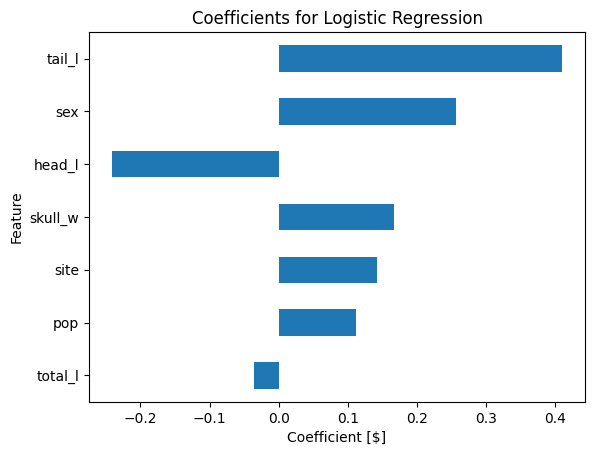

In [151]:
# Create your horizontal barchart here.
coefficients = lr_pipe.named_steps['logisticregression'].coef_
features = lr_pipe.feature_names_in_
print(features)
print(coefficients)
# Coeff sliced for first value in array.
feat_imp = pd.Series(coefficients[0], index=features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Logistic Regression');

In [152]:
import numpy as np
param_grid = {
    'logisticregression__C': np.arange(0.1, 2.0, .2),
    # 'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}
clf = RandomizedSearchCV(lr_pipe, param_grid)
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

RandomizedSearchCV(estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('onehotencoder',
                                              OneHotEncoder(cols=[],
                                                            use_cat_names=True)),
                                             ('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   param_distributions={'logisticregression__C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])})

In [156]:
clf.best_score_


0.27132352941176474

In [155]:
clf.best_params_

{'logisticregression__C': 0.5000000000000001}